folder results_500/
folder results_1000/
folder results_2000/
flav1 =  0 , flav2 =  0


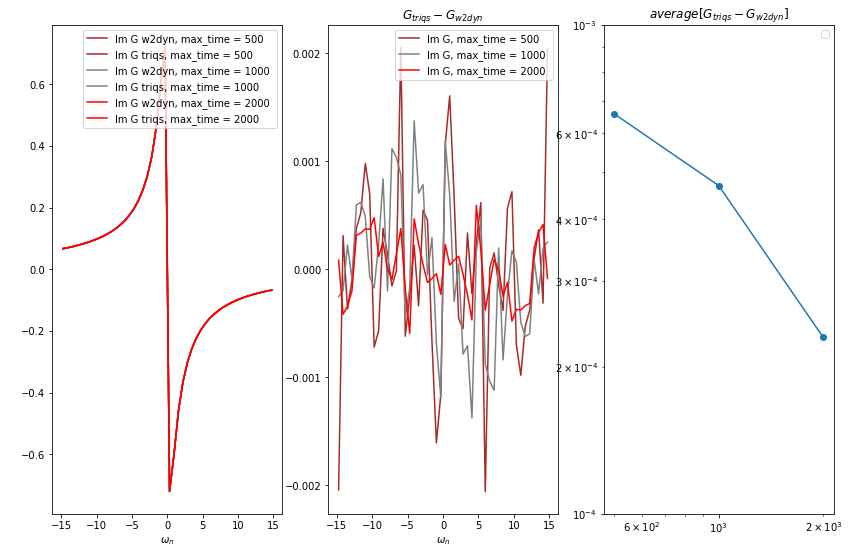

4.658709355844684e-16
2.2828087661522226e-16
9.64248081248699e-17
3.775868295414807e-16
folder results_500/
folder results_1000/
folder results_2000/
flav1 =  1 , flav2 =  1


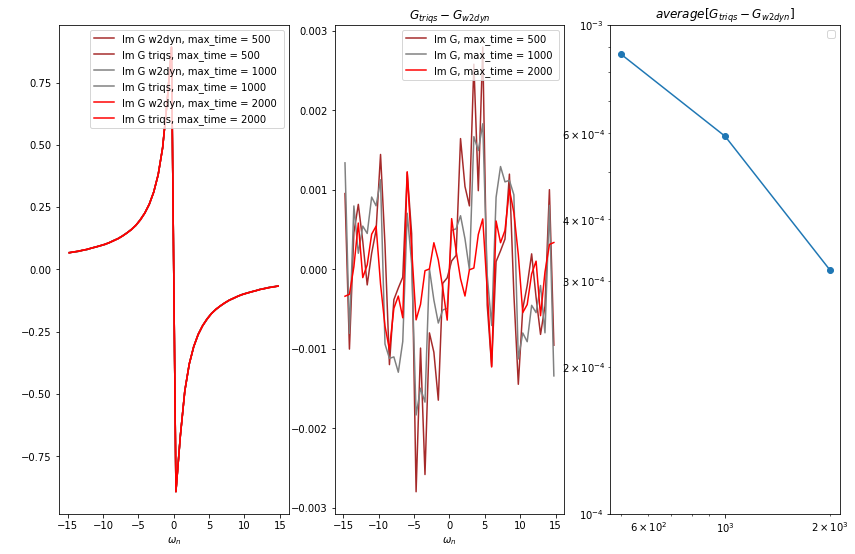

folder results_500/
folder results_1000/
folder results_2000/
flav1 =  1 , flav2 =  2


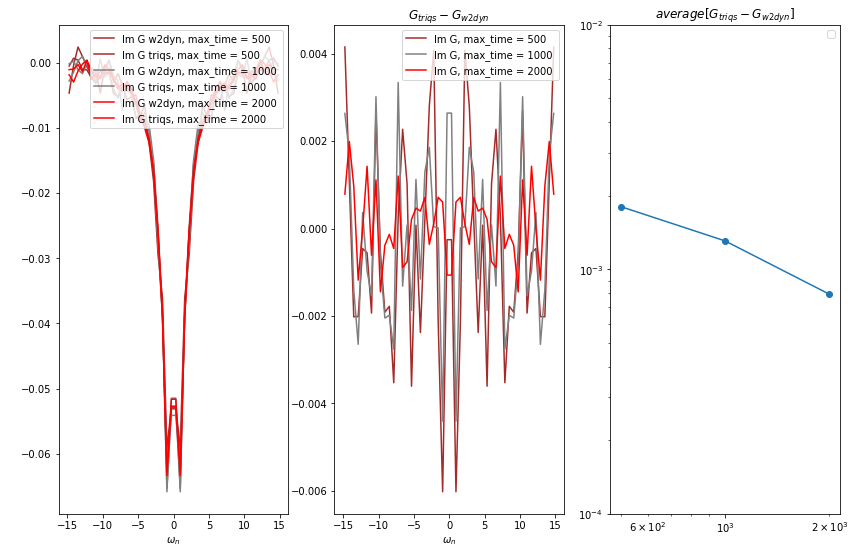

folder results_500/
folder results_1000/
folder results_2000/
flav1 =  1 , flav2 =  3


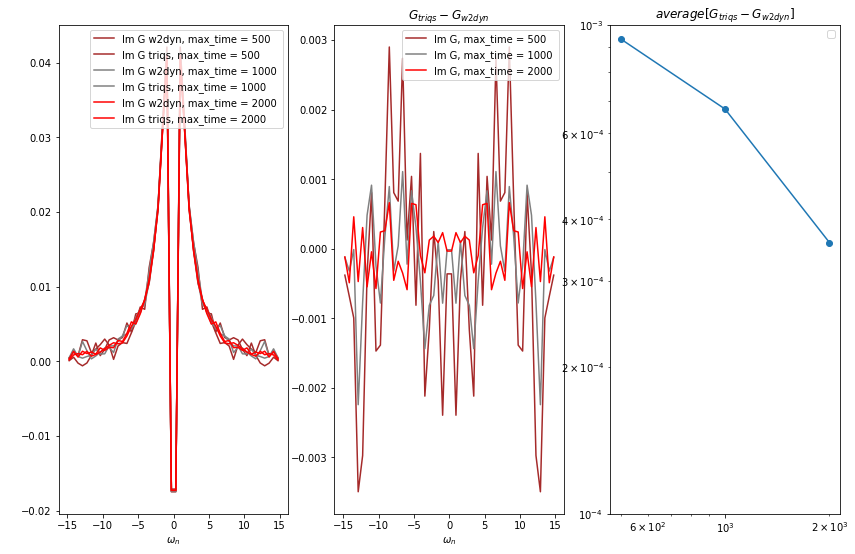

1.603073535399675e-16
folder results_500/
folder results_1000/
folder results_2000/
flav1 =  2 , flav2 =  1


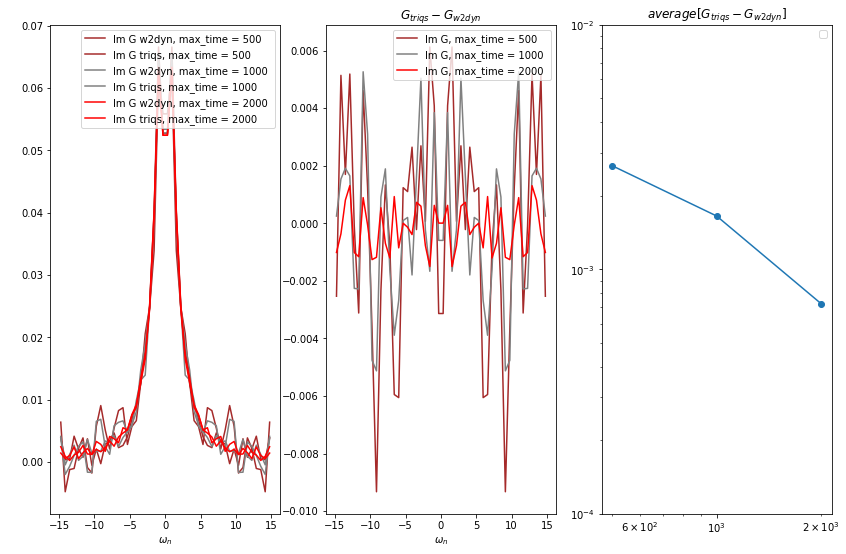

folder results_500/
folder results_1000/
folder results_2000/
flav1 =  2 , flav2 =  2


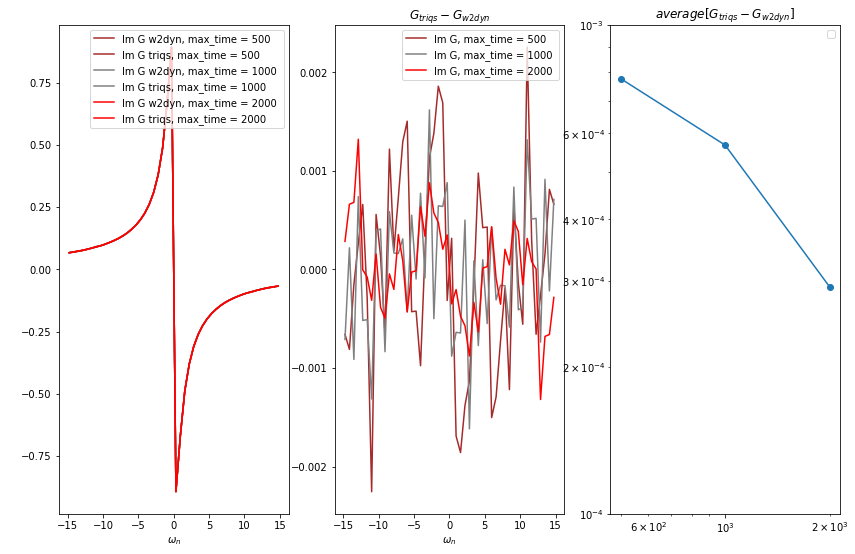

folder results_500/
folder results_1000/
folder results_2000/
flav1 =  2 , flav2 =  3


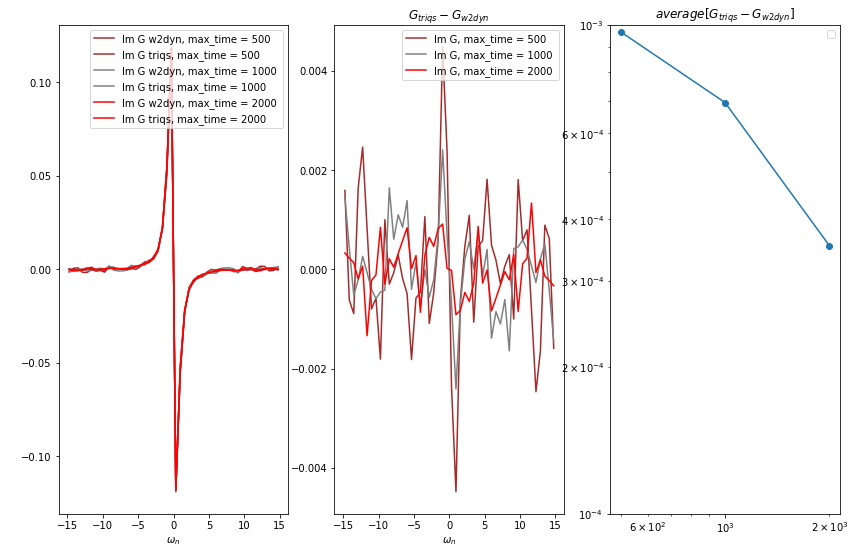

1.0390280012611221e-16
folder results_500/
folder results_1000/
folder results_2000/
flav1 =  3 , flav2 =  1


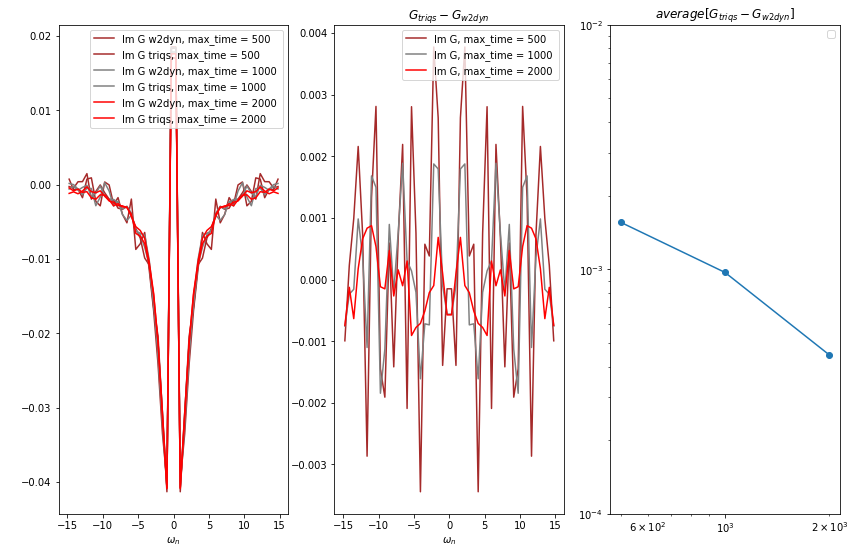

folder results_500/
folder results_1000/
folder results_2000/
flav1 =  3 , flav2 =  2


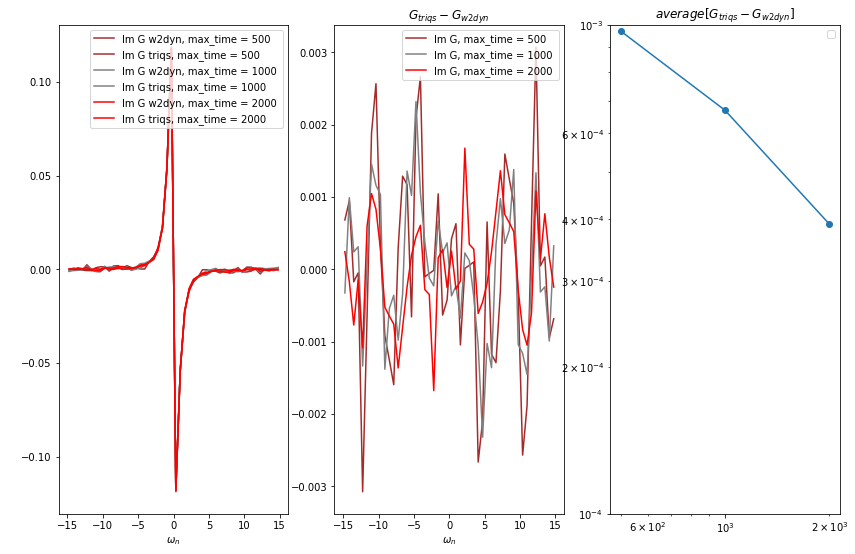

folder results_500/
folder results_1000/
folder results_2000/
flav1 =  3 , flav2 =  3


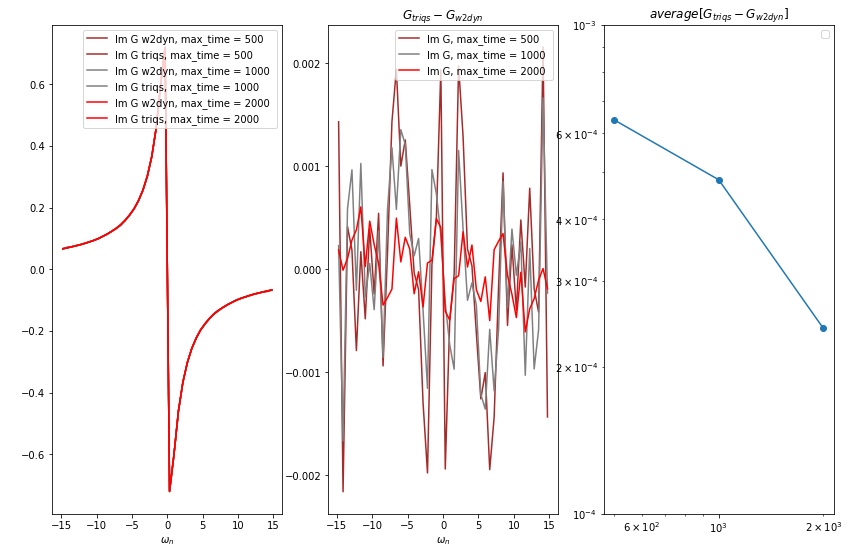

folder results_500/
folder results_1000/
folder results_2000/
flav1 =  0 , flav2 =  0


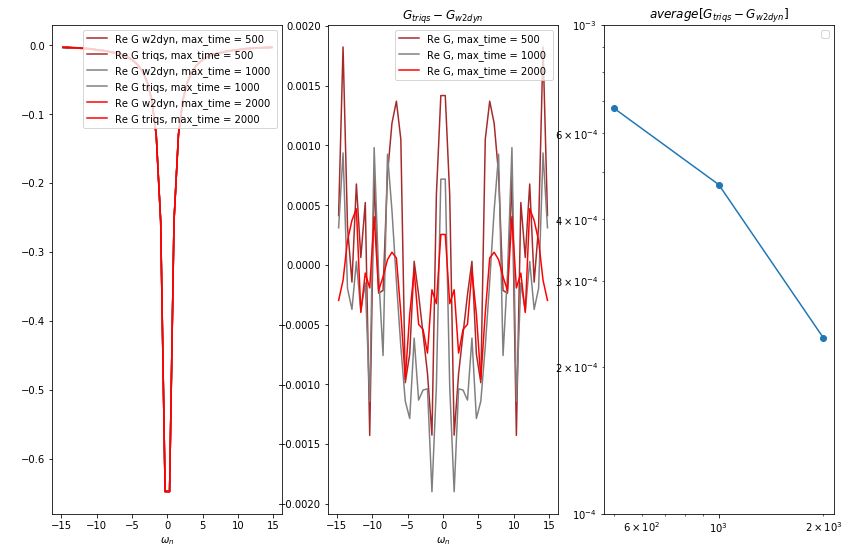

4.658709355844684e-16
2.2828087661522226e-16
9.64248081248699e-17
3.775868295414807e-16
folder results_500/
folder results_1000/
folder results_2000/
flav1 =  1 , flav2 =  1


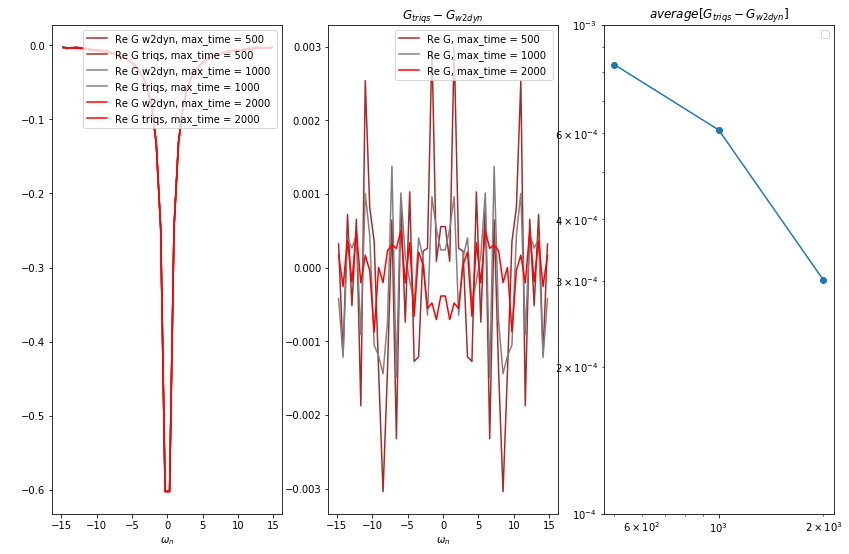

folder results_500/
folder results_1000/
folder results_2000/
flav1 =  1 , flav2 =  2


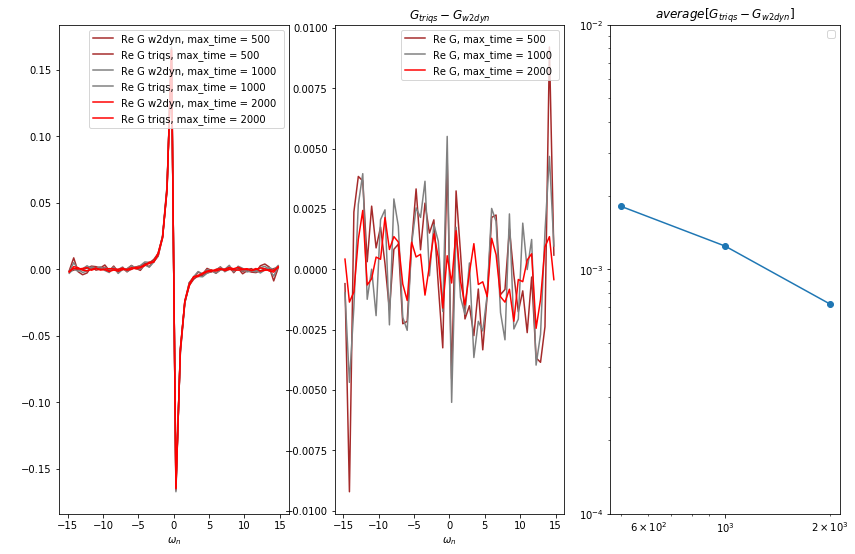

folder results_500/
folder results_1000/
folder results_2000/
flav1 =  1 , flav2 =  3


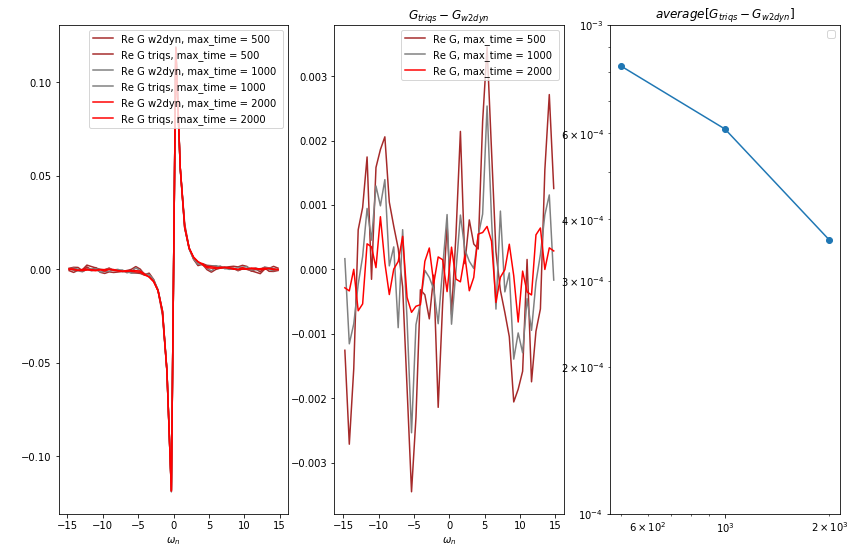

1.603073535399675e-16
folder results_500/
folder results_1000/
folder results_2000/
flav1 =  2 , flav2 =  1


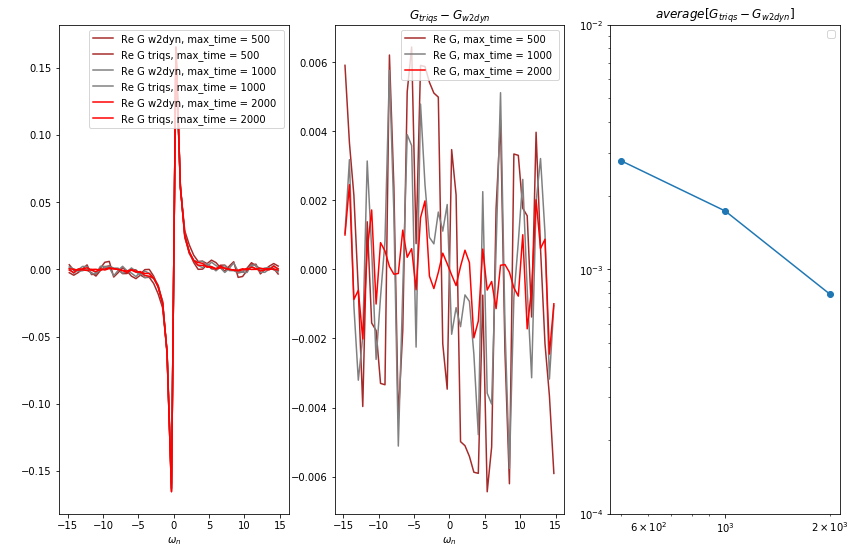

folder results_500/
folder results_1000/
folder results_2000/
flav1 =  2 , flav2 =  2


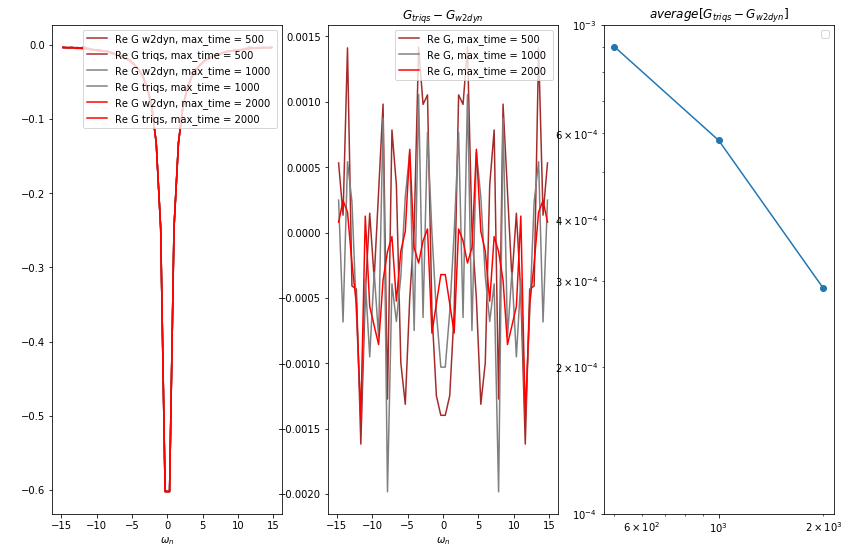

folder results_500/
folder results_1000/
folder results_2000/
flav1 =  2 , flav2 =  3


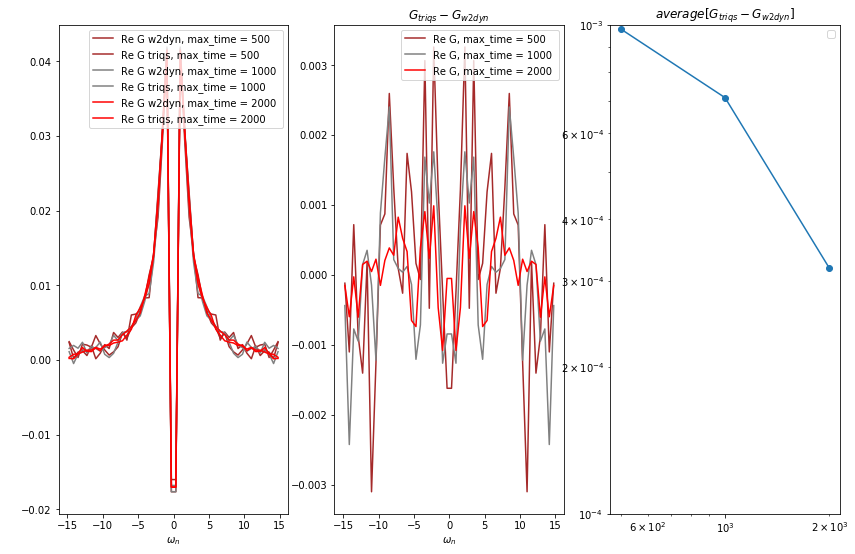

1.0390280012611221e-16
folder results_500/
folder results_1000/
folder results_2000/
flav1 =  3 , flav2 =  1


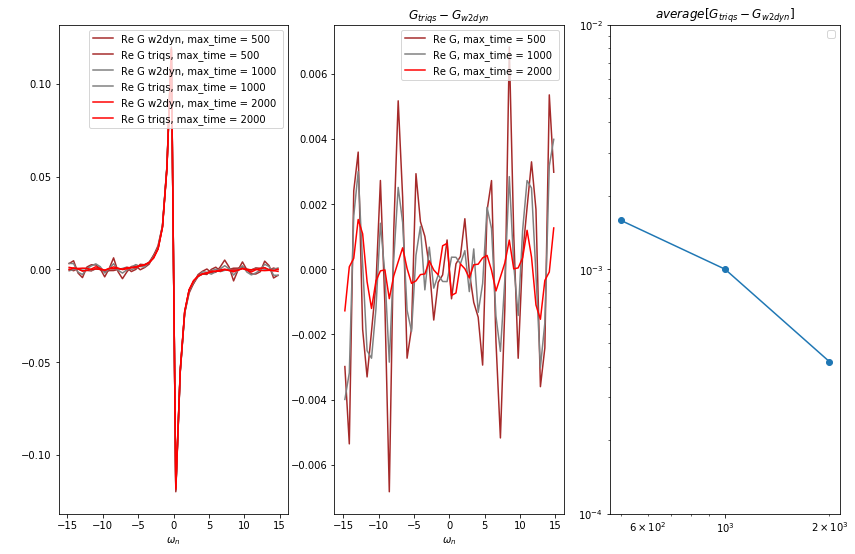

folder results_500/
folder results_1000/
folder results_2000/
flav1 =  3 , flav2 =  2


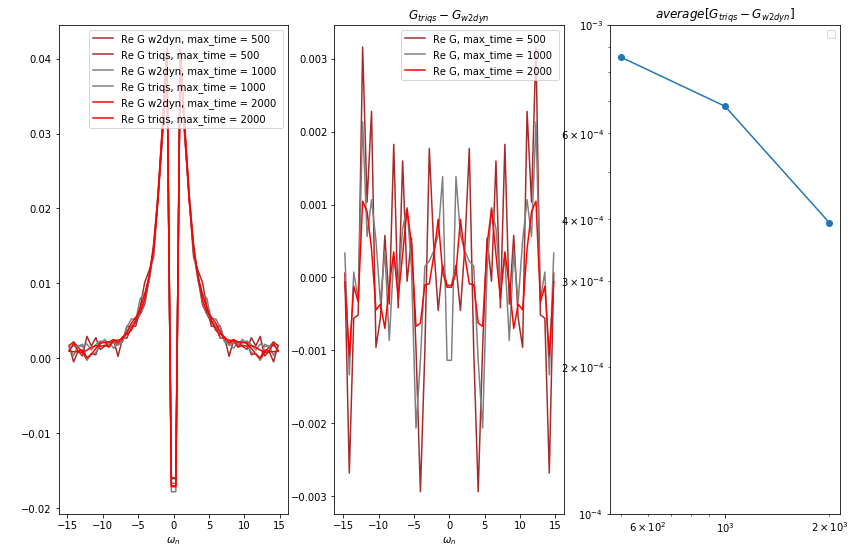

folder results_500/
folder results_1000/
folder results_2000/
flav1 =  3 , flav2 =  3


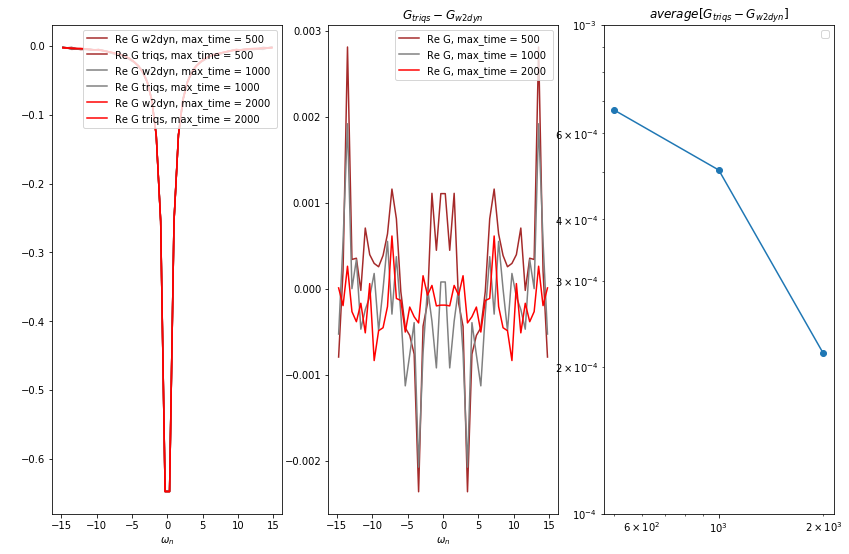

In [2]:
from pytriqs.gf import *
from pytriqs.archive import *
from pytriqs.plot.mpl_interface import oplot, oploti, oplotr, plt
import numpy as np
plt.rcParams["figure.figsize"] = (14,9)
#plt.rcParams["figure.figsize"] = (10,6)

color=['brown', 'grey', 'red', 'green', 'blue', 'black']
#titlecolor=['grey', 'red', 'green', 'black']

plt.rcParams.update({'font.size': 10})

for m in {"I", "R"}:
    for f1 in range(0,4):
        for f2 in range(0,4):


            data = []

            variances = []
            differences = []

            #times = [250, 500, 1000, 2000, 4000, 8000]
            times = [500, 1000, 2000]
            #times = [250]
            
            triqs = HDFArchive('results_500/cthyb___onlygiw.h5','r')
            #print max(np.abs(triqs['G']["bl"][f1,f2].data))
            #break   
            if max(np.abs(triqs['G']["bl"][f1,f2].data)) < 1e-7:
                print max(np.abs(triqs['G']["bl"][f1,f2].data))
                continue
                
            for nt, max_time in enumerate(times):

                folder = "results_"+str(max_time)+"/"
                print 'folder', folder

                w2dyn = HDFArchive(folder+'w2dyn_cthyb___onlygiw.h5','r')
                triqs = HDFArchive(folder+'cthyb___onlygiw.h5','r')

                #iw_max = 30

                #ind_min = 182
                #ind_max = 517

                iw_max = 15

                ind_min = 81
                ind_max = 259

                def real_or_imag(array):

                    if m == "R":
                        return np.real(array)
                    else:
                        return np.imag(array)

                ### calculate variance and differences
                v = np.var(real_or_imag(w2dyn['G']["bl"][f1,f2].data[ind_min:ind_max]-triqs['G']["bl"][f1,f2].data[ind_min:ind_max]))
                d = np.average(np.abs(real_or_imag(w2dyn['G']["bl"][f1,f2].data[ind_min:ind_max]-triqs['G']["bl"][f1,f2].data[ind_min:ind_max])))

                variances = np.append(variances, v)
                differences = np.append(differences, d)
                
                ### plot plot plot the stuff
                plt.subplot(1, 3, 1)
                label = "G w2dyn, max_time = " + str(max_time)
                oplot(w2dyn['G']["bl"][f1,f2], '-', x_window = (-iw_max,iw_max), mode = m, name = label , color = color[nt])
                label = "G triqs, max_time = " + str(max_time)
                oplot(triqs['G']["bl"][f1,f2], '-', x_window = (-iw_max,iw_max), mode = m, name = label , color = color[nt])
                plt.ylabel(" ")


                ### plot plot plot the stuff
                label = "G, max_time = " + str(max_time)
                plt.subplot(1, 3, 2)
                plt.title("$G_{triqs}-G_{w2dyn}$")
                oplot(triqs['G']["bl"][f1,f2]-w2dyn['G']["bl"][f1,f2], '-', x_window = (-iw_max,iw_max), mode = m, name = label , color = color[nt])
                plt.ylabel(" ")

            print "flav1 = ", f1, ", flav2 = ", f2

            def get_log_boundaries(arr1, arr2):

                maxval = max(np.amax(arr1), np.amax(arr2))
                minval = min(np.amin(arr1), np.amin(arr2))

                expon = np.floor(np.log10(np.abs(maxval))).astype(int)
                upperbound = 10.0**(expon+1)

                expon = np.floor(np.log10(np.abs(minval))).astype(int)
                lowerbound = 10.0**(expon)

                return (lowerbound, upperbound)
                #return (minval/2, maxval*2)

            ax3 = plt.subplot(1, 3, 3)
            plt.loglog(times, differences, "o-", label = None)

            plt.ylim(get_log_boundaries(differences, differences))

            plt.title("$average[G_{triqs}-G_{w2dyn}]$")
            plt.ylabel(" ")

            plt.legend(loc = 'best')

            plt.show()